# The Small-World Phenomenon

The “small-world phenomenon” -the principle that we are all linked by short chains of acquaintances- was inaugurated as an area of experimental study in the social sciences through the pioneering work of Stanley Milgram in the 1960’s. This work was among the first to make the phenomenon quantitative, allowing people to speak of the “six degrees of separation” between any two people in the United States. Since then, a number of network models have been proposed as frameworks in which to study the problem analytically. One of the most refined of these models was formulated in recent work of Watts and Strogatz.

A social network exhibits the "small-world phenomenon" if, roughly speaking, any two individuals in the network are likely to be connected through a short sequence of intermediate acquaintances.

Milgram’s basic small-world experiment remains one of the most compelling ways to think about the problem. The goal of the experiment was to find short chains of acquaintances linking pairs of people in the United States who did not know one another. In a typical run of the experiment, a source person in Nebraska would be given a letter to deliver to a target person in Massachusetts. The source would initially be told basic information about the target, including his address and occupation; the source would then be instructed to send the letter to someone she knew on a first-name basis in an effort to transmit the letter to the target as efficaciously as possible. Anyone subsequently receiving the letter would be given the same instructions, and the chain of communication would continue until the target was reached. Over many trials, the average number of intermediate steps in a successful chain was found to lie between five and six, a quantity that has since entered popular culture as the “six degrees of separation” principle.

![](Kleinberg.png)


## Exercise

# TO DO
Elegir metricas de comparación entre una red small-world net y una red aleatoria.
Limpiar codigo innecesario despues de elegir.


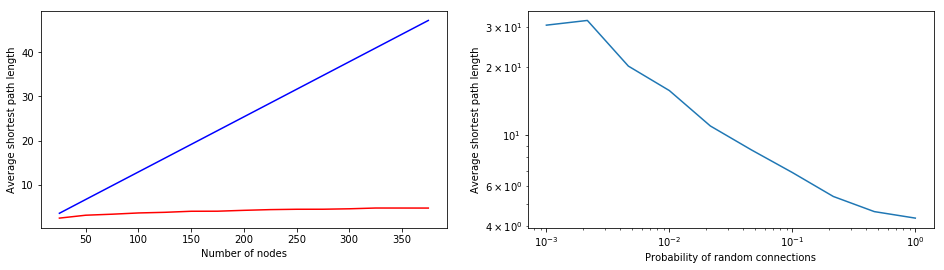

In [235]:
#### %matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from networkx.classes import number_of_nodes
from networkx.classes import number_of_edges
from networkx.generators import gnm_random_graph
from networkx.generators.geometric import navigable_small_world_graph
from networkx.generators.random_graphs import connected_watts_strogatz_graph
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length
from networkx.algorithms.connectivity.connectivity import average_node_connectivity
from networkx.algorithms.distance_measures import diameter
from networkx import is_directed_acyclic_graph
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length
from networkx.algorithms.shortest_paths import all_pairs_shortest_path_length

def getResult(G):
    G = max(nx.connected_component_subgraphs(G), key=len) # Remove isolated nodes
    return average_shortest_path_length(G)
    #return diameter(G)
    #return average_node_connectivity(G)
    

# Calculate the average path length versus the probability of new random connections
n_range = range(25, 400, 25)
results1 = np.zeros(len(n_range))
results2 = np.zeros(len(n_range))
for ix,num_nodes in enumerate(n_range):
    # Kleinberg model (returns a directed net)
    #G = navigable_small_world_graph(number_of_nodes, p=1, q=1, r=2)) 
    # Random model
    #G = gnm_random_graph(number_of_nodes, number_of_edges
    # Watts-Strogatz model
    # k (int) – Each node is joined with its k nearest neighbors in a ring topology.
    # p (float) – The probability of adding a new edge for each edge.
    results1[ix] = getResult(connected_watts_strogatz_graph(num_nodes, k=4, p=0))
    results2[ix] = getResult(connected_watts_strogatz_graph(num_nodes, k=4, p=0.5))

# Calculate the average path length versus the probability of new random connections
p_range = np.logspace(-3, 0, num=10)
p_average_path = np.zeros(len(p_range))
for ix,p in enumerate(p_range):
    G = connected_watts_strogatz_graph(300, k=4, p=p)
    p_average_path[ix] = getResult(G)


# Plot figures
plt.figure(figsize=(16, 4), dpi=72)
plt.subplot(1,2,1)
plt.xlabel("Number of nodes")
plt.ylabel("Average shortest path length")
plt.plot(n_range, results1 , 'b');
plt.plot(n_range, results2, 'r');

plt.subplot(1,2,2)
plt.xlabel("Probability of random connections")
plt.ylabel("Average shortest path length")
plt.loglog(p_range, p_average_path);
plt.show()

# References
- Kleinberg, Jon. ["The small-world phenomenon: An algorithmic perspective."](https://ecommons.cornell.edu/bitstream/handle/1813/7430/99-1776.pdf?sequence=1) Proceedings of the thirty-second annual ACM symposium on Theory of computing. ACM, 2000.